In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # For handling class imbalance

In [5]:
# Load dataset
df = pd.read_csv("placement.csv")

In [6]:
# Check dataset structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None


In [7]:
# Drop unnecessary columns if needed
df = df.iloc[:, 1:]

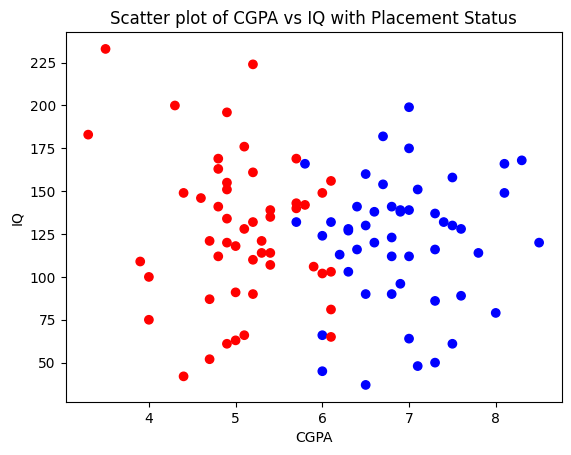

In [8]:
# Scatter plot (Better visualization)
plt.scatter(df["cgpa"], df["iq"], c=df["placement"].map({0: "red", 1: "blue"}))
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter plot of CGPA vs IQ with Placement Status")
plt.show()

In [9]:
# Split features and target
X = df.iloc[:, 0:2]  # Assuming first two columns are features
y = df.iloc[:, -1]   # Last column is target

In [10]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
X_train

array([[-1.73718527, -0.62029848],
       [ 1.45537303,  0.09806189],
       [-0.9390457 , -1.62087186],
       [ 0.03645823,  0.63683217],
       [ 1.1893265 , -0.97947867],
       [-0.14090612,  0.45724208],
       [-0.9390457 ,  0.79076654],
       [ 1.1893265 , -1.90308486],
       [-0.49563482,  0.3802749 ],
       [-1.82586745, -0.38939693],
       [ 1.63273738, -0.26111829],
       [-1.38245657,  0.63683217],
       [ 0.92327998,  1.91961855],
       [ 1.45537303, -0.90251149],
       [ 2.2535126 , -0.10718393],
       [-0.76168135,  1.32953682],
       [-0.9390457 ,  0.25199626],
       [-1.38245657, -2.10833068],
       [-0.76168135, -1.49259322],
       [ 1.1893265 , -0.20980684],
       [ 0.8345978 ,  0.35461917],
       [-0.67299917,  0.9447009 ],
       [-0.14090612,  1.07297954],
       [-0.67299917, -0.87685576],
       [ 0.74591563, -0.31242975],
       [ 1.01196215, -1.95439632],
       [ 0.8345978 , -0.72292139],
       [ 1.8987839 ,  1.07297954],
       [ 0.74591563,

In [14]:
X_test

array([[ 1.36669085,  0.14937335],
       [ 2.07614825,  1.124291  ],
       [ 0.30250475,  0.07240616],
       [ 0.03645823, -1.49259322],
       [ 1.36669085, -1.62087186],
       [-1.20509222,  0.55986499],
       [-0.9390457 , -0.10718393],
       [-0.9390457 ,  1.84265137],
       [ 0.03645823, -2.0313635 ],
       [ 0.74591563, -0.03021675]])

In [15]:
y_train

18    0
30    1
73    0
33    0
90    1
     ..
60    1
71    1
14    0
92    0
51    0
Name: placement, Length: 90, dtype: int64

In [16]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
Name: placement, dtype: int64

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [18]:
# Train Logistic Regression model with balanced class weight
clf = LogisticRegression(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [19]:
# Predictions
y_pred = clf.predict(X_test)

In [20]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.80


In [21]:
# Detailed performance report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



In [27]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

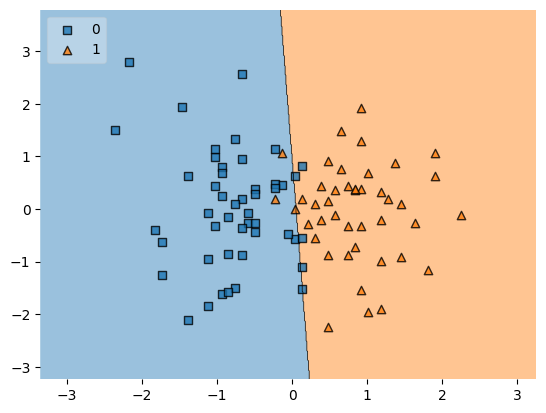

In [28]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [29]:
import pickle

In [30]:
pickle.dump(clf,open('model.pkl','wb'))